In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def draw(model, nb_list):
    for nb in nb_list:
        n_logi = 2 * nb
        data_lamb, data_seed, data_infidelity, data_postsel_infidelity = [], [], [], []

        f = open(f"{model}_sweep_lamb_{nb}blocks_noise=0.1_t=1.txt")
        for line in f.readlines():
            line = line.strip().replace("#blocks =", "").replace("noise =", "").replace("lamb =", "").replace(
                "t =", "").replace("seed =", "").replace("innerprod =", "").replace("leakage =", "").replace(
                "postsel_", "").replace(",", "")
            _, _, lamb, _, seed, innerprod, _, postsel_innerprod = line.split()
            data_lamb.append(int(lamb))
            data_seed.append(int(seed))
            data_infidelity.append(1 - abs(complex(innerprod)) ** 2)
            data_postsel_infidelity.append(1 - abs(complex(postsel_innerprod)) ** 2)
        f.close()

        df = pd.DataFrame(data={
            "lamb": data_lamb,
            "seed": data_seed,
            "infidelity": data_infidelity,
            "postsel_infidelity": data_postsel_infidelity
        })

        assert np.all(df["lamb"].unique() == 2 ** np.arange(5, 15))

        newdf = df.groupby("lamb")["infidelity"].agg(['count', 'mean', 'std']).reset_index()
        print(f"{model}, {n_logi} sites, infidelity:")
        print(newdf)
        print("\n")
        lamb_arr = newdf["lamb"].to_numpy()
        mean_arr = newdf["mean"].to_numpy()
        std_arr = newdf["std"].to_numpy()

        plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                    label=f'{n_logi} sites',
                    fmt='o', markersize=3, zorder=2)

        lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
        plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
                label='fitted line (slope$={:.3f}$)'.format(lr.slope),
                color=plt.gca().lines[-1].get_color(),
                zorder=1,
                linestyle="--")

        newdf = df.groupby("lamb")["postsel_infidelity"].agg(['count', 'mean', 'std']).reset_index()
        print(f"{model}, {n_logi} sites, postselected infidelity:")
        print(newdf)
        print("\n")
        lamb_arr = newdf["lamb"].to_numpy()
        mean_arr = newdf["mean"].to_numpy()
        std_arr = newdf["std"].to_numpy()

        plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                    label=f'{n_logi} sites (postselected)',
                    fmt='o', markersize=3, zorder=2)

        lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
        plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
                label='fitted line (slope$={:.3f}$)'.format(lr.slope),
                color=plt.gca().lines[-1].get_color(),
                zorder=1,
                linestyle="--")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(r"$\lambda$")
    plt.ylabel("infidelity")
    plt.title(model + r", $t=1$")
    plt.legend(ncol=2, prop={'size': 8}, loc="lower left")
    plt.grid()
    plt.savefig(f"{model}_sweep_lamb_noise=0.1_t=1.pdf", format="pdf", bbox_inches="tight")
    plt.show()

1dTFIM, 4 sites, infidelity:
    lamb  count      mean       std
0     32     20  0.014762  0.004051
1     64     20  0.006376  0.001290
2    128     20  0.003485  0.001159
3    256     20  0.001795  0.000522
4    512     20  0.000883  0.000262
5   1024     20  0.000426  0.000125
6   2048     20  0.000198  0.000045
7   4096     20  0.000101  0.000033
8   8192     20  0.000058  0.000015
9  16384     20  0.000028  0.000008


1dTFIM, 4 sites, postselected infidelity:
    lamb  count          mean           std
0     32     20  8.785615e-04  2.725256e-04
1     64     20  2.668249e-04  8.088290e-05
2    128     20  5.587413e-05  1.717535e-05
3    256     20  1.872370e-05  5.784124e-06
4    512     20  4.764937e-06  1.474259e-06
5   1024     20  1.206680e-06  3.746837e-07
6   2048     20  2.881458e-07  8.948747e-08
7   4096     20  5.748360e-08  1.728352e-08
8   8192     20  1.557447e-08  4.903965e-09
9  16384     20  3.588017e-09  1.130055e-09


1dTFIM, 6 sites, infidelity:
    lamb  count 

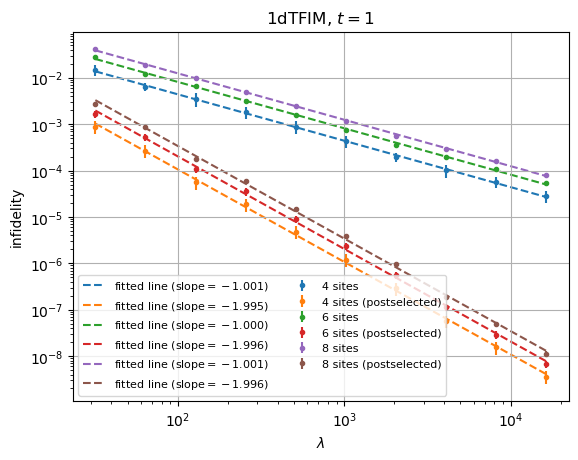

In [3]:
draw("1dTFIM",[2,3,4])

1dXZ, 4 sites, infidelity:
    lamb  count      mean       std
0     32     20  0.091730  0.020239
1     64     20  0.043156  0.009823
2    128     20  0.021298  0.006301
3    256     20  0.008180  0.001789
4    512     20  0.004091  0.000883
5   1024     20  0.002119  0.000451
6   2048     20  0.001162  0.000274
7   4096     20  0.000649  0.000217
8   8192     20  0.000236  0.000064
9  16384     20  0.000141  0.000035


1dXZ, 4 sites, postselected infidelity:
    lamb  count          mean           std
0     32     20  2.324213e-02  6.283176e-03
1     64     20  6.705029e-03  2.039053e-03
2    128     20  1.573704e-03  4.146919e-04
3    256     20  4.038980e-04  1.106110e-04
4    512     20  1.025779e-04  2.890170e-05
5   1024     20  2.608218e-05  7.697338e-06
6   2048     20  6.637159e-06  2.043670e-06
7   4096     20  1.647223e-06  4.596190e-07
8   8192     20  3.513261e-07  9.198544e-08
9  16384     20  8.864442e-08  2.286207e-08


1dXZ, 6 sites, infidelity:
    lamb  count      m

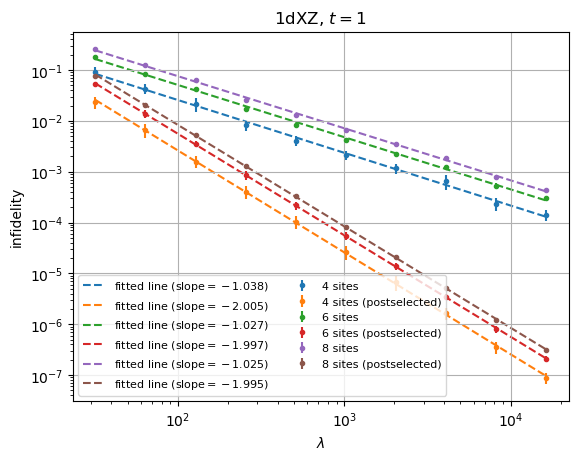

In [4]:
draw("1dXZ",[2,3,4])